In [1]:
import sklearn
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
data = load_iris()

In [3]:
df = pd.DataFrame(data['data'],columns = data['feature_names'])
df['target'] = data['target']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


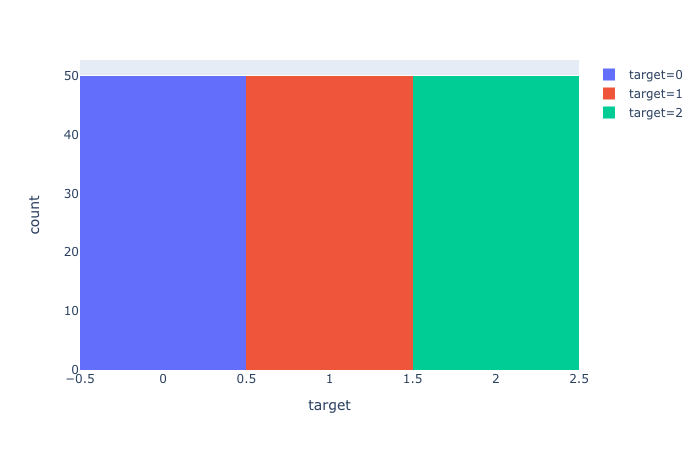

In [4]:
x = df['target'].value_counts().to_list()
fig = px.histogram(df,x = 'target',color = 'target')
fig.show('png')

50 instances of each class out of 150 instances.

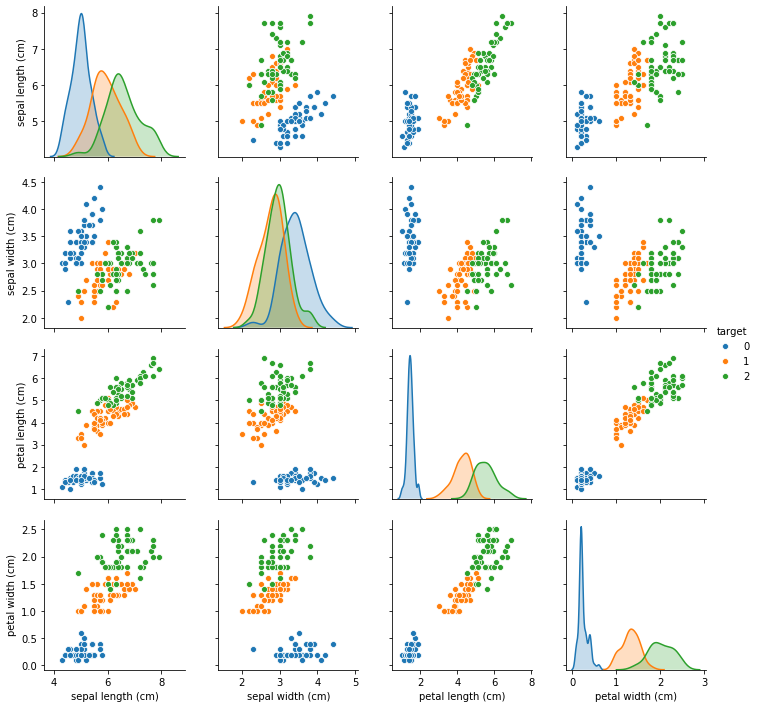

In [5]:
features = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
sns.pairplot(df, vars = features, hue = 'target')

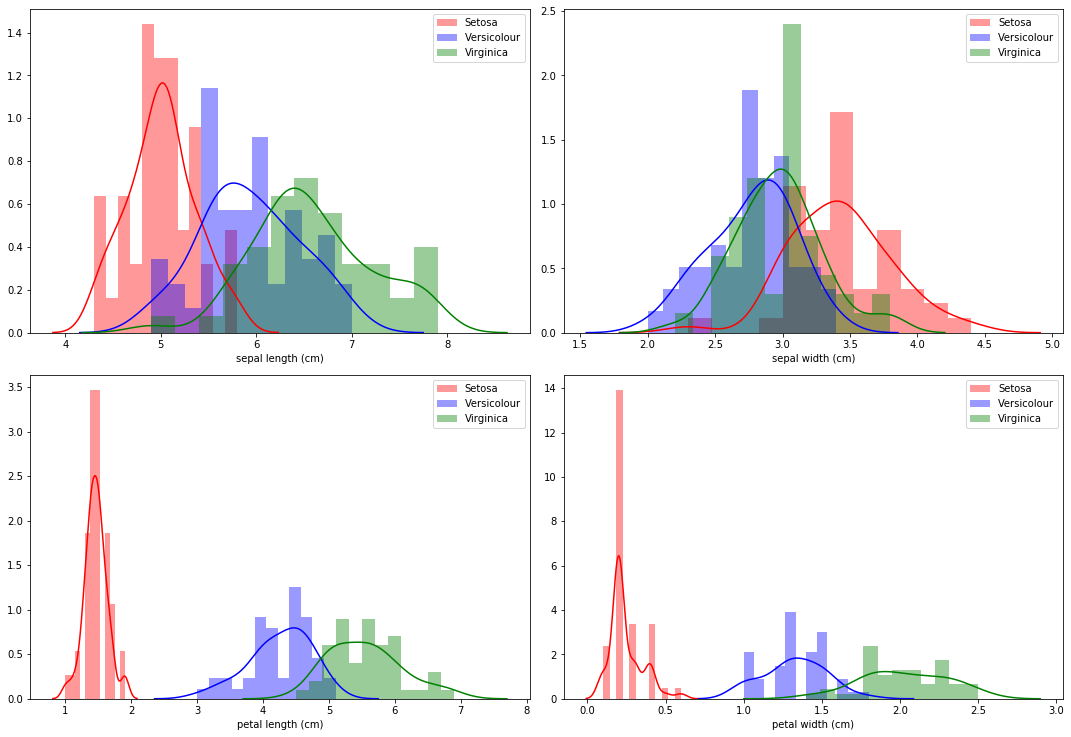

In [6]:
bins = 12
plt.figure(figsize=(15,15))
for i, feature in enumerate(features):
    rows = int(len(features)/2)+1
    plt.subplot(rows, 2, i+1)
    sns.distplot(df[df['target']==0][feature], bins=bins, color='red', label='Setosa');
    sns.distplot(df[df['target']==1][feature], bins=bins, color='blue', label='Versicolour');
    sns.distplot(df[df['target']==2][feature], bins=bins, color ='green', label = 'Virginica')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

As we can see, the sepal width will not be helpful in determining the class unlike the other features.

In [7]:
features_selected = ['sepal length (cm)','petal length (cm)','petal width (cm)']

### Machine Learning

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

The classifiers we will be using for predictions on the dataset are:

1. Stochastic Gradient Descent<br>
2. Naive Bayes<br>
3. Support Vector Machines (SVMs) <br>
4. K- Nearest Neighbors (KNNs) <br>
5. Random Forest Classifiers <br>

In [9]:
from sklearn import metrics
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

classifiers = [LogisticRegression(), SGDClassifier(), 
               GaussianNB(), SVC(), NuSVC(), LinearSVC(), 
               KNeighborsClassifier(),RandomForestClassifier()]

### All features

In [10]:
X = df.loc[:,features]
y = df.loc[:,'target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Train size: {}'.format(X_train.shape[0]))
print('Test size: {}'.format(X_test.shape[0]))

Train size: 120
Test size: 30


In [11]:
accuracy_train1 = []
accuracy_test1 = []
cv_score1 = []
f1_score1 = []


for classifier in classifiers:
    start = time.time()
    clf = classifier
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    cvscore = cross_val_score(clf, X, y, cv=5)

    end = time.time()

    accuracy_train1.append(accuracy_score(y_train_pred, y_train))
    accuracy_test1.append(accuracy_score(y_test_pred, y_test))
    cv_score1.append(np.mean(cvscore))
    f1_score1.append(f1_score(y_train_pred, y_train,average = None))

    print(str(classifier).split('(')[0])
    print('Precision: {}, Recall : {}'
          .format(precision_score(y_train_pred,y_train,average = None),
                  recall_score(y_train_pred,y_train,average = None)))
    print('Accuracy on training set: {:.2%}'
          .format(accuracy_score(y_train_pred, y_train)))
    print('Accuracy on test set: {:.2%}'
          .format(accuracy_score(y_test_pred, y_test)))
    print('Crossval score: {:.2%} (+/- {:.2%})'
          .format(np.mean(cvscore),np.std(cvscore)*2))
    print('Time taken : {:.5} seconds'
          .format(end - start))
    print('\n')

LogisticRegression
Precision: [1.         0.92682927 1.        ], Recall : [1.         1.         0.92857143]
Accuracy on training set: 97.50%
Accuracy on test set: 100.00%
Crossval score: 97.33% (+/- 4.99%)
Time taken : 0.13762 seconds


SGDClassifier
Precision: [1.         0.02439024 1.        ], Recall : [0.57142857 1.         0.79591837]
Accuracy on training set: 66.67%
Accuracy on test set: 70.00%
Crossval score: 87.33% (+/- 9.80%)
Time taken : 0.028454 seconds


GaussianNB
Precision: [1.         0.92682927 0.92307692], Recall : [1.         0.92682927 0.92307692]
Accuracy on training set: 95.00%
Accuracy on test set: 100.00%
Crossval score: 95.33% (+/- 5.33%)
Time taken : 0.019056 seconds


SVC
Precision: [1.         0.95121951 0.97435897], Recall : [1.    0.975 0.95 ]
Accuracy on training set: 97.50%
Accuracy on test set: 100.00%
Crossval score: 96.67% (+/- 4.22%)
Time taken : 0.01841 seconds


NuSVC
Precision: [1.         0.92682927 0.97435897], Recall : [1.         0.97435897 0

In [12]:
index = list(map(lambda x: str(x).split('(')[0],classifiers))
d = {'accuracy_train_all': accuracy_train1,
     'accuracy_test_all':accuracy_test1,
     'cv_score_all': cv_score1,
     'f1_score_all' : list(map(lambda x: sum(x)/3,f1_score1))}
measures = pd.DataFrame(d,index=index)
measures

,accuracy_train_all,accuracy_test_all,cv_score_all,f1_score_all
LogisticRegression,0.975000,1.0,0.973333,0.974996
SGDClassifier,0.666667,0.7,0.873333,0.553752
GaussianNB,0.950000,1.0,0.953333,0.949969
SVC,0.975000,1.0,0.966667,0.974996
NuSVC,0.966667,1.0,0.966667,0.966667
LinearSVC,0.975000,1.0,0.966667,0.974996
KNeighborsClassifier,0.966667,1.0,0.973333,0.966667
RandomForestClassifier,1.000000,1.0,0.966667,1.000000
